<a href="https://colab.research.google.com/github/danielrodriguez007/Data_Analysis/blob/main/Online_Food.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import plotly.graph_objects as go 
sns.set()

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/onlinefoods.csv')
data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


In [3]:
data.isnull().sum()

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
Unnamed: 12                   0
dtype: int64

In [4]:
data.columns

Index(['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'latitude', 'longitude',
       'Pin code', 'Output', 'Feedback', 'Unnamed: 12'],
      dtype='object')

In [5]:
data.dtypes

Age                             int64
Gender                         object
Marital Status                 object
Occupation                     object
Monthly Income                 object
Educational Qualifications     object
Family size                     int64
latitude                      float64
longitude                     float64
Pin code                        int64
Output                         object
Feedback                       object
Unnamed: 12                    object
dtype: object

In [6]:
data.corr()

,Age,Family size,latitude,longitude,Pin code
Age,1.000000,0.169982,0.006595,0.047500,0.137294
Family size,0.169982,1.000000,-0.053537,0.070126,-0.009402
latitude,0.006595,-0.053537,1.000000,-0.144234,-0.201813
longitude,0.047500,0.070126,-0.144234,1.000000,0.156119
Pin code,0.137294,-0.009402,-0.201813,0.156119,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


In [8]:
np.around(data.describe(),2)

,Age,Family size,latitude,longitude,Pin code
count,388.00,388.00,388.00,388.00,388.00
mean,24.63,3.28,12.97,77.60,560040.11
std,2.98,1.35,0.04,0.05,31.40
min,18.00,1.00,12.87,77.48,560001.00
25%,23.00,2.00,12.94,77.57,560010.75
50%,24.00,3.00,12.98,77.59,560033.50
75%,26.00,4.00,13.00,77.63,560068.00
max,33.00,6.00,13.10,77.76,560109.00


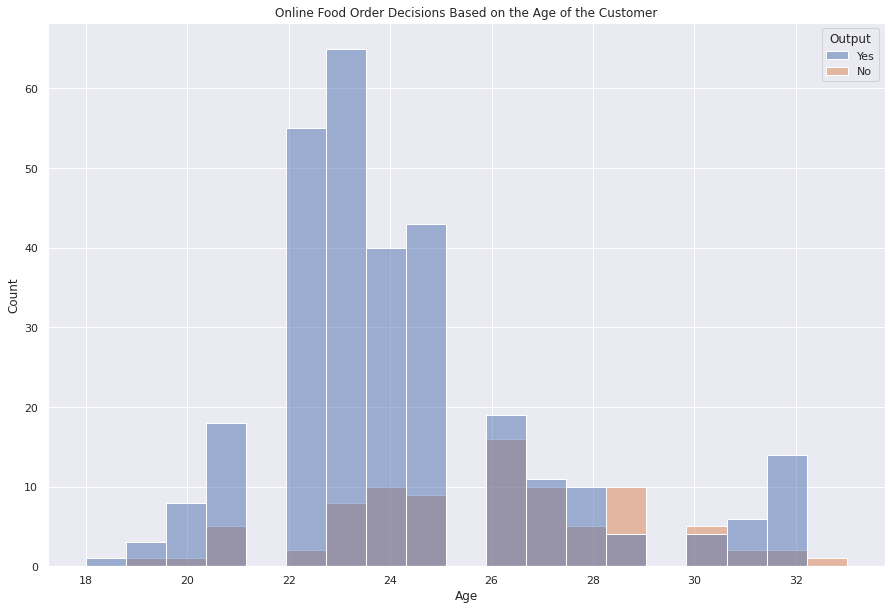

In [9]:
plt.figure(figsize=(15,10))
plt.title('Online Food Order Decisions Based on the Age of the Customer')
sns.histplot(x='Age', hue='Output', data=data)
plt.show()

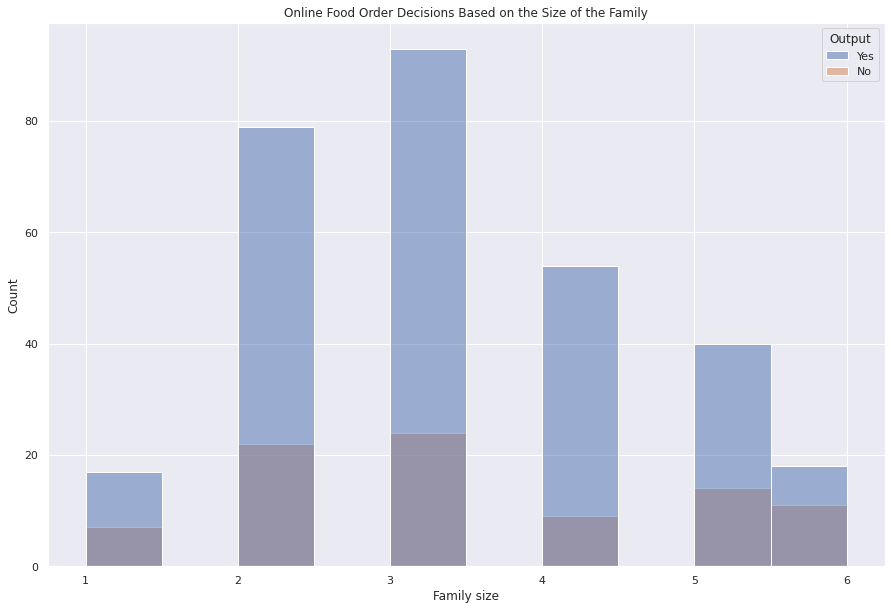

In [10]:
plt.figure(figsize=(15,10))
plt.title("Online Food Order Decisions Based on the Size of the Family")
sns.histplot(x='Family size', hue='Output', data=data)
plt.show()

In [11]:
buying_again_data = data.query("Output == 'Yes'")
print(buying_again_data.head())

   Age  Gender Marital Status Occupation  Monthly Income  \
0   20  Female         Single    Student       No Income   
1   24  Female         Single    Student  Below Rs.10000   
2   22    Male         Single    Student  Below Rs.10000   
3   22  Female         Single    Student       No Income   
4   22    Male         Single    Student  Below Rs.10000   

  Educational Qualifications  Family size  latitude  longitude  Pin code  \
0              Post Graduate            4   12.9766    77.5993    560001   
1                   Graduate            3   12.9770    77.5773    560009   
2              Post Graduate            3   12.9551    77.6593    560017   
3                   Graduate            6   12.9473    77.5616    560019   
4              Post Graduate            4   12.9850    77.5533    560010   

  Output   Feedback Unnamed: 12  
0    Yes   Positive         Yes  
1    Yes   Positive         Yes  
2    Yes  Negative          Yes  
3    Yes   Positive         Yes  
4    Yes   P

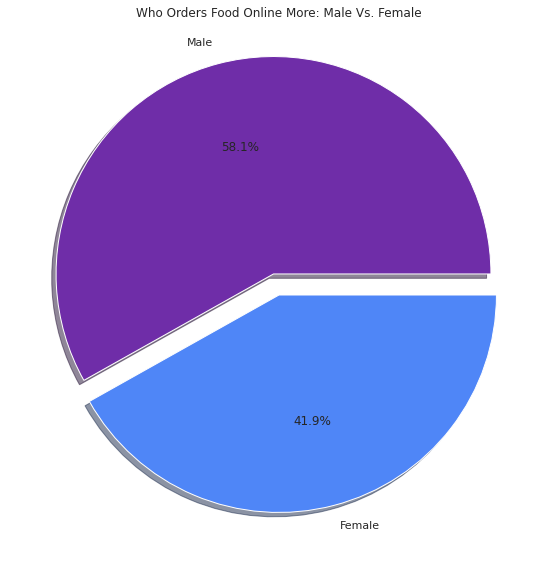

In [12]:
gender = buying_again_data['Gender'].value_counts()
label= gender.index
counts = gender.values
colors =['#6f2da8','#4f86f7', '#fc5a8d', '#F4BB44']
explode=[0.1,0]

plt.figure(figsize=(10,10))
plt.pie(x=counts, labels=label, colors=colors, autopct='%1.1f%%', shadow=True, explode=explode)
plt.title("Who Orders Food Online More: Male Vs. Female")
plt.show()


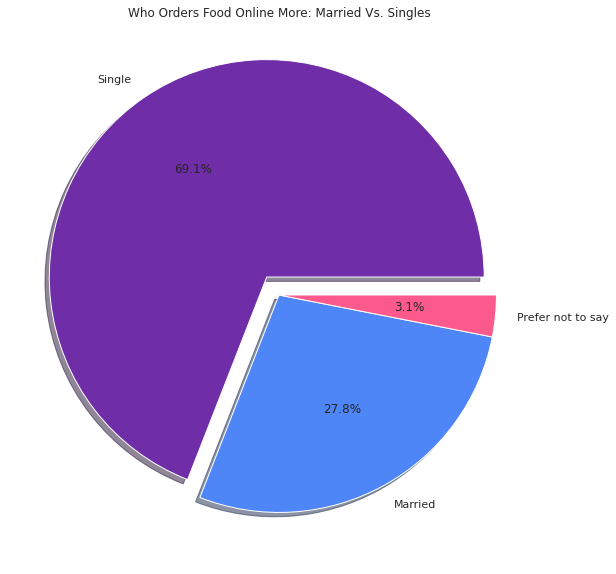

In [17]:
marital = data['Marital Status'].value_counts()
labels= marital.index
count = marital.values
colors =['#6f2da8','#4f86f7', '#fc5a8d', '#F4BB44']
explode=[0.1,0,0]

plt.figure(figsize=(10,10))
plt.pie(x=count, labels=labels,colors=colors, autopct='%1.1f%%', shadow=True, explode=explode)
plt.title("Who Orders Food Online More: Married Vs. Singles")
plt.show()

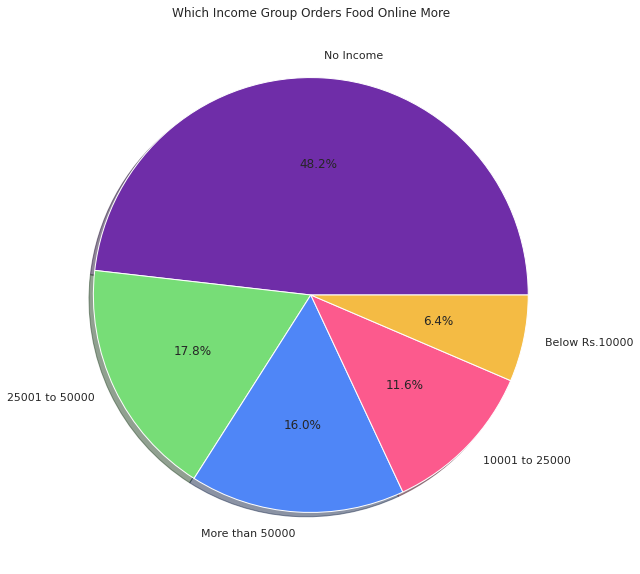

In [21]:
monthly = data["Monthly Income"].value_counts()
labels = monthly.index 
counts = monthly.values 
colors =['#6f2da8','#77dd77','#4f86f7', '#fc5a8d', '#F4BB44', '#fff700']

plt.figure(figsize=(10,10))
plt.pie(x=counts, labels=labels, shadow=True, autopct="%1.1f%%", colors=colors)
plt.title("Which Income Group Orders Food Online More")
plt.show()

In [34]:
data["Gender"] = data["Gender"].map({"Male": 1, "Female": 0})
data["Marital Status"] = data["Marital Status"].map({"Married": 2, 
                                                     "Single": 1, 
                                                     "Prefer not to say": 0})
data["Occupation"] = data["Occupation"].map({"Student": 1, 
                                             "Employee": 2, 
                                             "Self Employeed": 3, 
                                             "House wife": 4})
data["Educational Qualifications"] = data["Educational Qualifications"].map({"Graduate": 1, 
                                                                             "Post Graduate": 2, 
                                                                             "Ph.D": 3, "School": 4, 
                                                                             "Uneducated": 5})
data["Monthly Income"] = data["Monthly Income"].map({"No Income": 0, 
                                                     "25001 to 50000": 5000, 
                                                     "More than 50000": 7000, 
                                                     "10001 to 25000": 25000, 
                                                     "Below Rs.10000": 10000})
data["Feedback"] = data["Feedback"].map({"Positive": 1, "Negative ": 0})
data['Unnamed: 12'] = data['Unnamed: 12'].map({"Yes":1, "No":0})
print(data.head())

   Age  Gender  Marital Status  Occupation  Monthly Income  \
0   20     NaN             NaN         NaN             NaN   
1   24     NaN             NaN         NaN             NaN   
2   22     NaN             NaN         NaN             NaN   
3   22     NaN             NaN         NaN             NaN   
4   22     NaN             NaN         NaN             NaN   

   Educational Qualifications  Family size  latitude  longitude  Pin code  \
0                         NaN            4   12.9766    77.5993    560001   
1                         NaN            3   12.9770    77.5773    560009   
2                         NaN            3   12.9551    77.6593    560017   
3                         NaN            6   12.9473    77.5616    560019   
4                         NaN            4   12.9850    77.5533    560010   

  Output  Feedback  Unnamed: 12  
0    Yes       NaN            1  
1    Yes       NaN            1  
2    Yes       NaN            1  
3    Yes       NaN          

In [36]:
from sklearn.model_selection import train_test_split 
x = np.array(data[["Age", "Gender", "Marital Status", "Occupation", 
                   "Monthly Income", "Educational Qualifications", 
                   "Family size", "Pin code", "Feedback"]])
y = np.array(data[["Output"]])

In [37]:
from sklearn.ensemble import RandomForestClassifier
xtrain, ytrain, xtest, ytest = train_test_split(x, y,
                                                test_size=0.5,
                                                random_state=42)
model = RandomForestClassifier()
model.fit(xtrain, ytrain)
print(model.score(xtest,ytest))

ValueError: ignored

In [33]:
data['Unnamed: 12'].unique()

array(['Yes', 'No'], dtype=object)